#Preface

### Key Terms (Simplified)

**Neuron**
A basic unit of a neural network that receives inputs, applies weights and bias, and outputs a value after activation.

**Weights and Bias**
Trainable parameters that adjust during training to help the model learn patterns from data.

**Activation Function (ReLU / Sigmoid / Softmax)**
Adds nonlinearity to the network. ReLU is common in hidden layers, Sigmoid for binary output, Softmax for multi-class.

**Layer (Input, Hidden, Output)**
Input layer receives the data, hidden layers learn patterns, and output layer gives final predictions.

**Loss Function**
Measures how wrong predictions are. The goal during training is to minimize loss.

**Optimizer (SGD / Adam)**
Adjusts weights based on gradients to reduce loss over iterations.

**Epoch**
One full pass of the model through the training dataset.

**Training vs Validation Data**
Training data teaches the model, validation data checks how well it generalizes.




NN:
https://www.youtube.com/watch?v=aircAruvnKk
---

### CNN-Specific Terms

**Convolution Layer**
Uses filters to extract features like edges, shapes, and textures from images.

**Filter / Kernel**
A small matrix that slides across the image to detect specific features.

**Feature Map**
Output of applying filters in a convolution layer.

**Pooling (Max Pooling)**
Reduces the size of feature maps to make computation efficient and prevent overfitting.

**Flatten**
Converts feature maps into a one-dimensional vector before sending to fully connected layers.

**Fully Connected Layer**
Connects every neuron to the next layer. Used at the end of CNNs for classification.




#Neural Networks

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


We import machine learning, visualization, and preprocessing libraries.
Seaborn and Matplotlib help us visualize the dataset before modeling.

In [36]:
np.random.seed(42)

num_samples = 300

battery_life = np.random.randint(12, 48, num_samples)
heart_rate_accuracy = np.random.randint(85, 100, num_samples)
water_resistance = np.random.randint(20, 100, num_samples)
display_quality = np.random.randint(5, 10, num_samples)
price = np.random.randint(150, 600, num_samples)

rating = (
    battery_life * 0.03 +
    heart_rate_accuracy * 0.01 +
    water_resistance * 0.01 +
    display_quality * 0.4 -
    price * 0.003 +
    np.random.normal(0, 3, num_samples)
)


rating = np.clip(np.round(rating), 1, 5)

df = pd.DataFrame({
    "battery_life": battery_life,
    "heart_rate_accuracy": heart_rate_accuracy,
    "water_resistance": water_resistance,
    "display_quality": display_quality,
    "price": price,
    "rating": rating
})

df.head(100)


,battery_life,heart_rate_accuracy,water_resistance,display_quality,price,rating
0,40,85,48,5,430,2.0
1,26,92,56,6,508,1.0
2,19,98,57,7,350,5.0
3,32,98,27,6,395,5.0
4,30,96,84,7,427,5.0
...,...,...,...,...,...,...
95,38,96,75,5,445,5.0
96,46,94,49,9,166,2.0
97,12,87,24,9,278,5.0
98,46,89,52,7,366,5.0


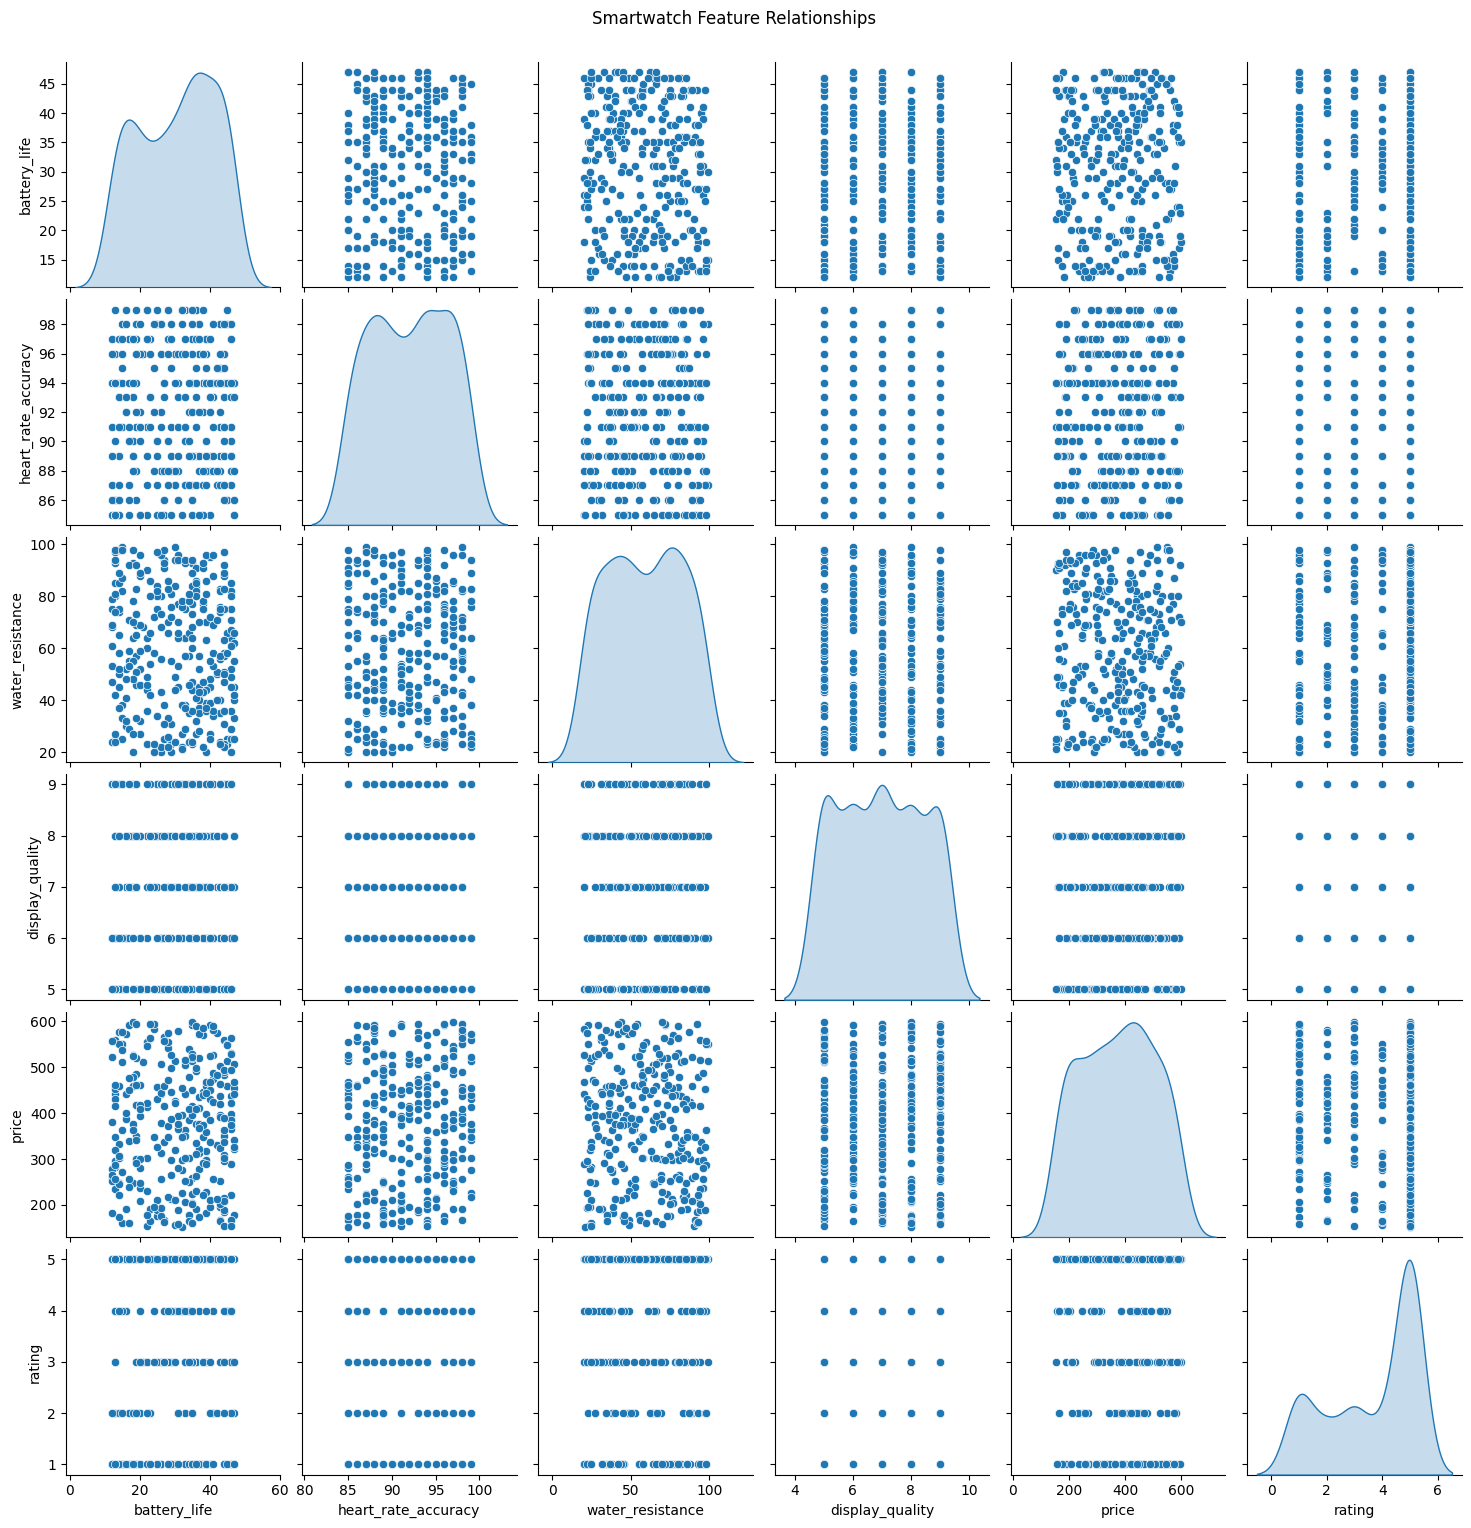

In [37]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Smartwatch Feature Relationships", y=1.02)
plt.show()


##Prepare Data for Training

In [38]:
X = df.drop("rating", axis=1).values
y = df["rating"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#We split data into training and testing sets and normalize input values.
#Scaling stabilizes training and ensures fair learning for all features.

In [39]:
#Build the Neural Network
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1)
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

A fully connected neural network with two hidden layers learns relationships between smartwatch specs and user rating.
The final layer outputs a single number (regression).

##Compile the Model

In [40]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [50]:
#Train the model

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5991 - mae: 1.0874 - val_loss: 3.2010 - val_mae: 1.5033
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.6495 - mae: 1.1045 - val_loss: 3.1636 - val_mae: 1.4870
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5545 - mae: 1.0951 - val_loss: 3.1708 - val_mae: 1.4821
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3821 - mae: 1.0247 - val_loss: 3.1906 - val_mae: 1.4907
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8255 - mae: 1.1634 - val_loss: 3.1734 - val_mae: 1.4871
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6620 - mae: 1.1131 - val_loss: 3.1780 - val_mae: 1.4825
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6328 - mae: 1.1001 - val_loss: 3.1839 - val_mae: 1.4861
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6237 - mae: 1.1170 - val_loss: 3.1816 - val_mae: 1.4811
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5360 -

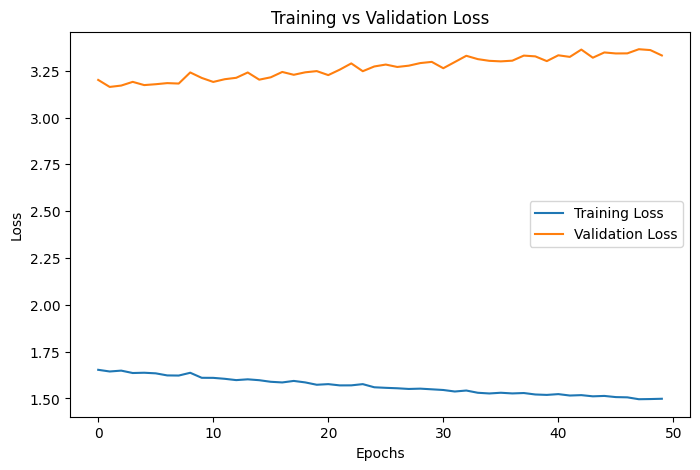

In [51]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


This graph visualizes how the model improves over time.
Ideally, both training and validation losses decrease smoothly.

In [13]:
#Evaluate

In [52]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test MAE:", round(test_mae, 2))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.4244 - mae: 1.3227
Test MAE: 1.33


Test MAE of 1.08 means that, on average, the model’s smartwatch rating predictions are off by about 1 stars. Since ratings range from 1 to 5, this error is noticeable and shows that the model has learned some patterns but is still not accurate. This result tells us the model needs improvement through tuning or better features. In simple terms: the predictions work, but they’re not reliable yet.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


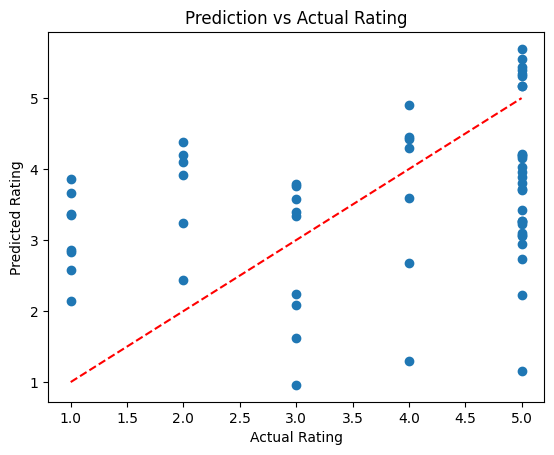

In [53]:
preds = model.predict(X_test).flatten()

plt.scatter(y_test, preds)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Prediction vs Actual Rating")
plt.plot([1,5],[1,5], 'r--')  # perfect line
plt.show()


#Difference
Linear regression can only learn simple straight-line relationships between inputs and the output. Neural networks, on the other hand, can learn complex, non-linear patterns using hidden layers and activation functions. Neural networks automatically discover feature interactions, while linear regression requires manually engineering them. Because of this, neural networks can solve much more advanced problems, such as image or speech recognition. In simple terms: linear regression is a basic model; a neural network is a powerful, more flexible extension.

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 15.9424 - mae: 3.6434 - val_loss: 15.0910 - val_mae: 3.5515 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.2007 - mae: 3.3782 - val_loss: 13.0236 - val_mae: 3.2369 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.1149 - mae: 3.2564 - val_loss: 11.0776 - val_mae: 2.9075 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.7087 - mae: 2.8364 - val_loss: 9.2450 - val_mae: 2.6127 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3360 - mae: 2.4339 - val_loss: 7.4931 - val_mae: 2.3492 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5071 - mae: 2.1601 - val_loss: 5.9773 - val_mae: 2.1231 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2326 - mae: 2.1929 - val_loss: 4.7599 - val_mae: 1.9170 - learning_rate: 0.0010
Epoch 8/50

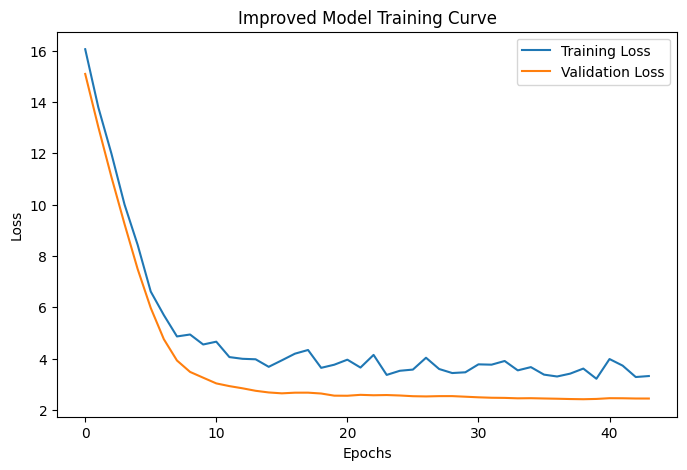

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.1729 - mae: 1.2384 
Improved Test MAE: 1.24
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


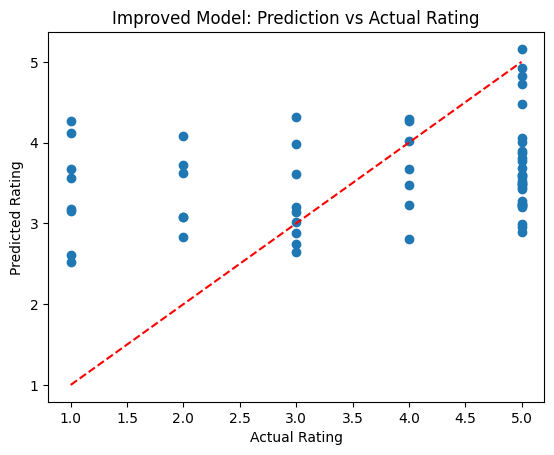

In [49]:
# ---------------------------
# 📌 Improved Neural Network
# ---------------------------

from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build improved model
improved_model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1)  # regression output
])

improved_model.summary()

# Compile with tuned learning rate
improved_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Add callbacks: Early stopping + LR reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# Train improved model
history_improved = improved_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Plot training curves
plt.figure(figsize=(8,5))
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Improved Model Training Curve")
plt.legend()
plt.show()

# Evaluate improved model
test_loss, test_mae = improved_model.evaluate(X_test, y_test)
print("Improved Test MAE:", round(test_mae, 2))

# Predict and visualize real vs predicted
preds_improved = improved_model.predict(X_test).flatten()

plt.scatter(y_test, preds_improved)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Improved Model: Prediction vs Actual Rating")
plt.plot([1,5],[1,5],'r--')  # perfect line
plt.show()


##Coding demo

This code trains a simple neural network to learn the relationship between smartwatch battery life and its rating.
We scale the output using a sigmoid activation so the model understands the rating must stay between 1 and 5.
By increasing neurons and training longer, the model learns the pattern more accurately.
Finally, we give the model a new value (battery life 12 hours) and ask it to predict a realistic rating.

In [63]:
#Demo here
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


# Dataset
battery_life = np.array([5,6,7,8,9,10,11,12,13,14], dtype=float)
ratings = np.array([2,2.5,3,3.5,4,4.5,4.8,5,5,5], dtype=float)

model = Sequential([
    Dense(16, activation='relu', input_shape=[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss='mse')
#set the trainging details

early_stop = EarlyStopping (
    monitor = 'loss',
    patience =50,
    restore_best_weights = True
)

model.fit(battery_life, ratings/5, epochs=500, verbose=2, callbacks = [early_stop])

#model predict
prediction = model.predict(np.array([12]))[0][0]*5 #multiply this with 5 so that we can scale the ratings
#print
print(round(prediction ,2))


Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 1s - 1s/step - loss: 0.0293
Epoch 2/500
1/1 - 0s - 54ms/step - loss: 0.0281
Epoch 3/500
1/1 - 0s - 57ms/step - loss: 0.0269
Epoch 4/500
1/1 - 0s - 147ms/step - loss: 0.0258
Epoch 5/500
1/1 - 0s - 76ms/step - loss: 0.0248
Epoch 6/500
1/1 - 0s - 142ms/step - loss: 0.0239
Epoch 7/500
1/1 - 0s - 159ms/step - loss: 0.0231
Epoch 8/500
1/1 - 0s - 125ms/step - loss: 0.0224
Epoch 9/500
1/1 - 0s - 75ms/step - loss: 0.0219
Epoch 10/500
1/1 - 0s - 52ms/step - loss: 0.0214
Epoch 11/500
1/1 - 0s - 66ms/step - loss: 0.0212
Epoch 12/500
1/1 - 0s - 68ms/step - loss: 0.0210
Epoch 13/500
1/1 - 0s - 137ms/step - loss: 0.0210
Epoch 14/500
1/1 - 0s - 55ms/step - loss: 0.0211
Epoch 15/500
1/1 - 0s - 55ms/step - loss: 0.0212
Epoch 16/500
1/1 - 0s - 64ms/step - loss: 0.0213
Epoch 17/500
1/1 - 0s - 68ms/step - loss: 0.0214
Epoch 18/500
1/1 - 0s - 155ms/step - loss: 0.0215
Epoch 19/500
1/1 - 0s - 51ms/step - loss: 0.0215
Epoch 20/500
1/1 - 0s - 71ms/step - loss: 0.0215
Epoch 21/500
1/1 - 0s - 65ms/step - l

In [64]:
#Demo here
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


# Dataset
battery_life = np.array([5,6,7,8,9,10,11,12,13,14], dtype=float)
ratings = np.array([2,2.5,3,3.5,4,4.5,4.8,5,5,5], dtype=float)

model = Sequential([
    Dense(16, activation='relu', input_shape=[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss='mse')
#set the trainging details

# early_stop = EarlyStopping (
#     monitor = 'loss',
#     patience =50,
#     restore_best_weights = True
# )

#model.fit(battery_life, ratings/5, epochs=500, verbose=2, callbacks = [early_stop])
model.fit(battery_life, ratings/5, epochs=500, verbose=2)

#model predict
prediction = model.predict(np.array([12]))[0][0]*5 #multiply this with 5 so that we can scale the ratings
#print
print(round(prediction ,2))


Epoch 1/500
1/1 - 1s - 1s/step - loss: 0.2718
Epoch 2/500
1/1 - 0s - 46ms/step - loss: 0.2582
Epoch 3/500
1/1 - 0s - 48ms/step - loss: 0.2447
Epoch 4/500
1/1 - 0s - 70ms/step - loss: 0.2313
Epoch 5/500
1/1 - 0s - 62ms/step - loss: 0.2181
Epoch 6/500
1/1 - 0s - 63ms/step - loss: 0.2050
Epoch 7/500
1/1 - 0s - 76ms/step - loss: 0.1923
Epoch 8/500
1/1 - 0s - 95ms/step - loss: 0.1798
Epoch 9/500
1/1 - 0s - 61ms/step - loss: 0.1677
Epoch 10/500
1/1 - 0s - 98ms/step - loss: 0.1560
Epoch 11/500
1/1 - 0s - 71ms/step - loss: 0.1448
Epoch 12/500
1/1 - 0s - 58ms/step - loss: 0.1341
Epoch 13/500
1/1 - 0s - 54ms/step - loss: 0.1239
Epoch 14/500
1/1 - 0s - 65ms/step - loss: 0.1144
Epoch 15/500
1/1 - 0s - 50ms/step - loss: 0.1053
Epoch 16/500
1/1 - 0s - 64ms/step - loss: 0.0969
Epoch 17/500
1/1 - 0s - 54ms/step - loss: 0.0891
Epoch 18/500
1/1 - 0s - 87ms/step - loss: 0.0819
Epoch 19/500
1/1 - 0s - 120ms/step - loss: 0.0753
Epoch 20/500
1/1 - 0s - 52ms/step - loss: 0.0693
Epoch 21/500
1/1 - 0s - 39ms/s

#CNN

This code loads the MNIST handwritten digit dataset and prepares the images for training.
It builds a Convolutional Neural Network (CNN) using layers that help the model detect patterns like edges and shapes.
The model trains on thousands of images and improves its accuracy over several passes (epochs).
After training, the model is tested on new unseen images to check its real-world performance.
Finally, it predicts digits from sample test images and displays both the images and the model’s guesses.

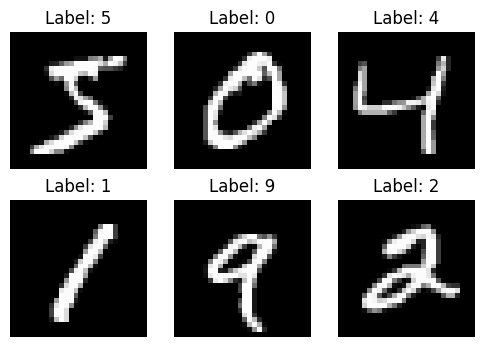

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8929 - loss: 0.3578 - val_accuracy: 0.9791 - val_loss: 0.0726
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9815 - loss: 0.0586 - val_accuracy: 0.9859 - val_loss: 0.0481
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9883 - loss: 0.0353 - val_accuracy: 0.9875 - val_loss: 0.0446
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9894 - val_loss: 0.0398
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.9877 - val_loss: 0.0497


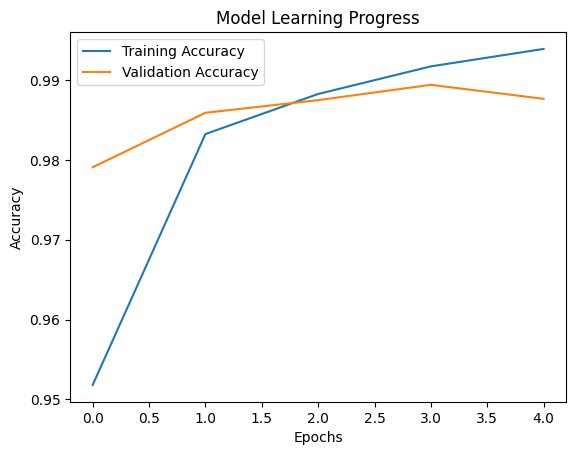

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9852 - loss: 0.0533

Test Accuracy: 98.81 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


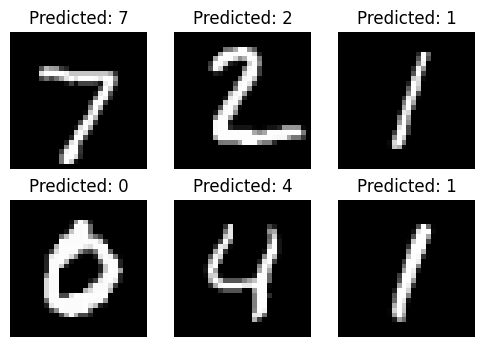

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# -------------------------------
# 1) Load and preprocess dataset
# -------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1 for easier training)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data so the CNN knows it's dealing with grayscale images
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# -------------------------------
# 2) Visualize some example images
# -------------------------------
plt.figure(figsize=(6,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# -------------------------------
# 3) Build CNN model
# -------------------------------
model = Sequential([

    # First convolution layer: detects edges and patterns
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    # Reduce image size while keeping important features
    MaxPooling2D((2,2)),

    # Second convolution layer: deeper pattern detection
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Flatten the features into a single vector for final classification
    Flatten(),

    # Fully connected layer – learns final relationships
    Dense(64, activation='relu'),

    # Output layer – softmax gives probabilities for digits 0–9
    Dense(10, activation='softmax')
])

# -------------------------------
# 4) Compile and train
# -------------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# -------------------------------
# 5) Plot training accuracy
# -------------------------------
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Learning Progress")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# -------------------------------
# 6) Evaluate model on unseen test data
# -------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", round(test_acc * 100, 2), "%")

# -------------------------------
# 7) Predict on sample images
# -------------------------------
predictions = model.predict(x_test[:9])

plt.figure(figsize=(6,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}")
    plt.axis('off')
plt.show()


Let's first find one image for each digit (0-9) from the test set to predict their outputs.

In [70]:
import numpy as np

# Find indices for one instance of each digit (0-9) in the test set
digit_indices = {}
for i in range(10):
    idx = np.where(y_test == i)[0][0] # Get the first occurrence of each digit
    digit_indices[i] = idx

# Select these images from the test set
x_test_digits = np.array([x_test[digit_indices[i]] for i in range(10)])
y_test_digits = np.array([y_test[digit_indices[i]] for i in range(10)])

print("Selected images from test set for digits 0-9:")
for i, (img, label) in enumerate(zip(x_test_digits, y_test_digits)):
    print(f"Digit {label} at index {digit_indices[i]}")

Selected images from test set for digits 0-9:
Digit 0 at index 3
Digit 1 at index 2
Digit 2 at index 1
Digit 3 at index 18
Digit 4 at index 4
Digit 5 at index 8
Digit 6 at index 11
Digit 7 at index 0
Digit 8 at index 61
Digit 9 at index 7


Now, let's predict the output for these selected images and visualize them.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


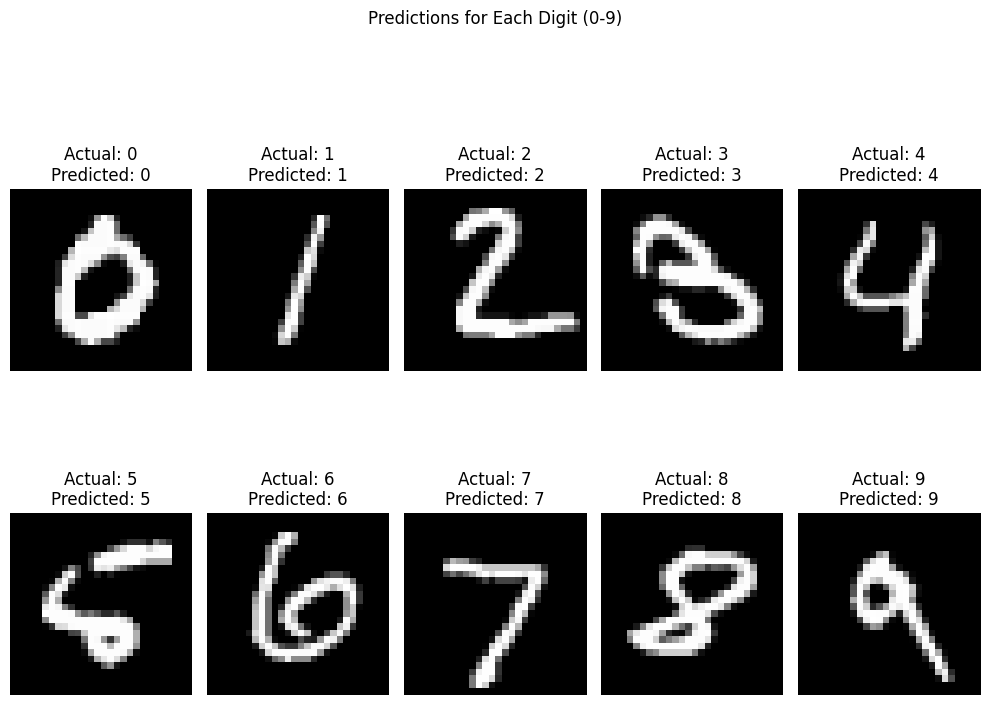

In [71]:
predictions_digits = model.predict(x_test_digits)

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_digits[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test_digits[i]}\nPredicted: {predictions_digits[i].argmax()}")
    plt.axis('off')
plt.suptitle("Predictions for Each Digit (0-9)", y=1.02)
plt.tight_layout()
plt.show()

##Pixels - edges - shapes - number guess - probablility (0-9)